# What we doin'
- In this notebook, I attempt to predict future oil production for specified months using a multi target neural network arcitecture

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
%matplotlib inline

In [199]:
data = pd.read_excel("2020.04.07 DJ Basin Dataset copy.xlsx")
data.columns = data.columns.astype(str)
print(data.shape)
data.head()

(7331, 91)


,API14,Field,County,Lateral Length,Latitude,Longitude,Peak,1,2,3,...,75,76,77,78,79,80,81,82,83,84
0,5001062740000,WATTENBERG,ADAMS,1896.0,39.938676,-104.653787,340.0,225.0,369.0,490.0,...,5123.0,5177.0,5242.0,5290.0,5327.0,5383.0,5422.0,5461.0,5524.0,5571.0
1,5001097400100,WILDCAT,ADAMS,2378.0,39.939829,-103.842604,998.0,1682.0,2411.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001097420000,WILDCAT,ADAMS,8140.0,39.779010,-104.614040,12923.0,16175.0,24778.0,31103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001097530100,DJ HORIZONTAL NIOBRARA,ADAMS,3912.0,39.766188,-104.548120,2418.0,2719.0,5137.0,6552.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001097540000,DJ HORIZONTAL NIOBRARA,ADAMS,3544.0,39.770004,-104.548231,3549.0,1192.0,2415.0,5964.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
data.columns

Index(['API14', 'Field', 'County', 'Lateral Length', 'Latitude', 'Longitude',
       'Peak', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84'],
      dtype='object')

In [201]:
## Lets start by using the first 6 months of production data, along with lat/long and 
## lateral length, to predict the next 12 months of production
data_try = data[['API14','Lateral Length','Latitude','Longitude','1', '2', '3', '4', '5', '6', '7', 
        '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48']]
print(data_try.shape)
data_try.head()

(7331, 52)


,API14,Lateral Length,Latitude,Longitude,1,2,3,4,5,6,...,39,40,41,42,43,44,45,46,47,48
0,5001062740000,1896.0,39.938676,-104.653787,225.0,369.0,490.0,545.0,885.0,971.0,...,2983.0,3040.0,3105.0,3161.0,3189.0,3238.0,3443.0,3708.0,3751.0,3805.0
1,5001097400100,2378.0,39.939829,-103.842604,1682.0,2411.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5001097420000,8140.0,39.779010,-104.614040,16175.0,24778.0,31103.0,36478.0,41302.0,44938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5001097530100,3912.0,39.766188,-104.548120,2719.0,5137.0,6552.0,7642.0,8571.0,9336.0,...,19469.0,19599.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5001097540000,3544.0,39.770004,-104.548231,1192.0,2415.0,5964.0,8277.0,9564.0,10582.0,...,21579.0,21685.0,21976.0,22156.0,22305.0,22427.0,22491.0,22559.0,22629.0,22712.0


In [203]:
## train/test split
# Dropping all nan's (wells that haven't yet reached 12 months of production)
from sklearn.model_selection import train_test_split
data_try.dropna(inplace=True)
print(data_try.shape)

# Splitting
X = data_try[['API14','Lateral Length','Latitude','Longitude','1', '2', '3', '4', '5', 
                '6', '7', '8', '9', '10', '11', '12']]

y = data_try[['13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48']]
X_train,X_test,y_train,y_test = train_test_split(X.drop('API14',axis=1),y,test_size=.20,random_state=101)

(3138, 52)


/Users/HarrisonHoffman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [206]:
## Neural net time boys
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1],activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(y.shape[1]))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 100)               1600      
_________________________________________________________________
dense_89 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_90 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_91 (Dense)             (None, 36)                1836      
Total params: 26,136
Trainable params: 26,136
Non-trainable params: 0
_________________________________________________________________


In [207]:
from keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss',patience=10)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=12, verbose=0)

In [208]:
preds = model.predict(X_test)

In [209]:
preds = pd.DataFrame(preds,columns=y.columns)
preds

,13,14,15,16,17,18,19,20,21,22,...,39,40,41,42,43,44,45,46,47,48
0,54068.234375,55041.234375,56257.722656,57552.851562,58774.257812,59642.277344,61030.468750,61695.085938,62774.218750,63797.238281,...,76127.960938,76587.351562,77170.218750,77563.539062,78201.937500,78742.867188,79154.625000,79718.109375,79967.179688,80523.359375
1,37972.925781,38658.656250,39536.449219,40401.945312,41380.171875,41876.363281,42933.273438,43384.449219,44167.882812,44798.195312,...,53747.179688,54091.152344,54499.511719,54750.644531,55232.347656,55577.601562,56004.656250,56341.203125,56468.996094,56836.738281
2,51331.175781,52204.472656,53520.160156,54800.300781,55995.640625,56632.964844,58141.718750,58722.625000,59950.816406,60944.093750,...,73374.648438,73790.203125,74510.093750,74641.171875,75578.859375,75955.031250,76574.164062,77112.953125,76986.179688,77811.625000
3,61706.585938,62787.882812,64589.394531,66111.125000,67619.656250,68451.632812,70297.093750,71028.382812,72538.492188,73879.421875,...,89276.406250,89769.546875,90696.750000,90912.710938,92163.835938,92580.460938,93238.984375,93974.046875,93725.945312,94841.257812
4,64284.460938,65546.492188,67479.007812,69236.937500,70920.796875,71763.500000,73879.820312,74684.007812,76426.625000,77907.328125,...,95290.265625,95854.984375,96923.835938,97070.414062,98413.703125,98897.000000,99725.585938,100508.187500,100265.546875,101447.515625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,57306.589844,58234.222656,59683.187500,61061.757812,62363.843750,63219.941406,64719.710938,65423.914062,66655.375000,67748.867188,...,81030.125000,81527.367188,82173.093750,82515.171875,83314.320312,83869.562500,84290.726562,84948.890625,85078.734375,85757.750000
624,51275.136719,52224.117188,53768.929688,55066.671875,56391.492188,57082.093750,58668.589844,59333.261719,60612.230469,61739.242188,...,75082.164062,75524.562500,76305.265625,76484.031250,77517.796875,77900.976562,78490.945312,79092.218750,78904.484375,79813.000000
625,30594.556641,31094.207031,31896.560547,32583.058594,33368.800781,33737.769531,34611.351562,34979.707031,35656.765625,36197.500000,...,43570.730469,43831.492188,44223.625000,44360.187500,44844.128906,45084.101562,45449.367188,45753.246094,45753.476562,46135.269531
626,65077.828125,67173.132812,68271.640625,69470.187500,71283.218750,72810.101562,74037.648438,75142.375000,76118.781250,77160.351562,...,91128.656250,91763.664062,92166.187500,93423.890625,93955.164062,94453.468750,94589.695312,95252.125000,95908.023438,96354.984375


In [210]:
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mdape(y_true, y_pred): 
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

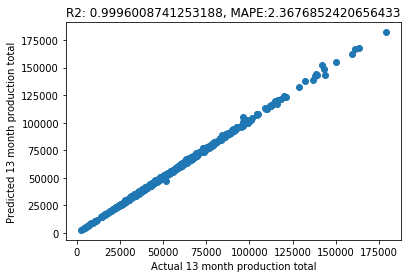

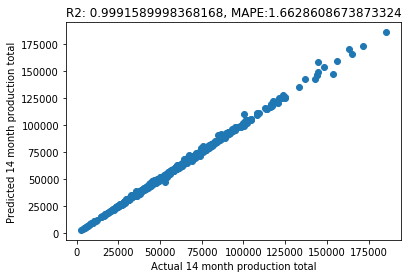

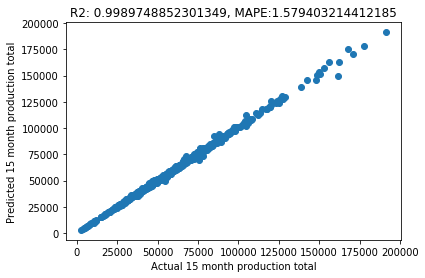

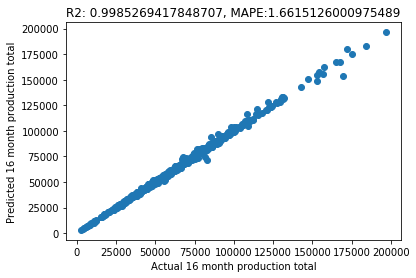

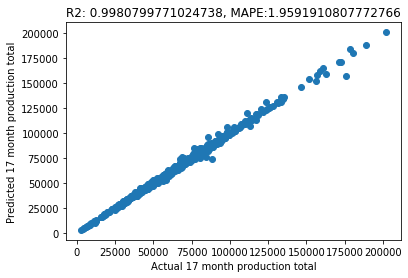

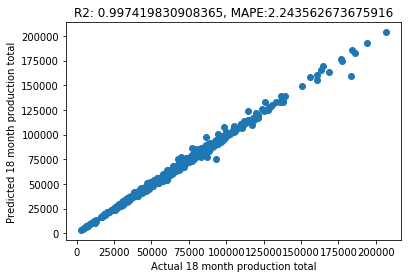

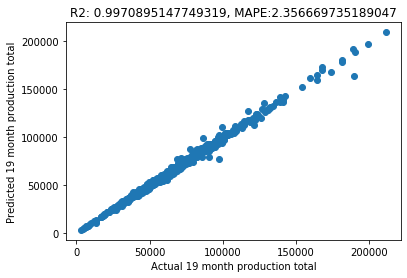

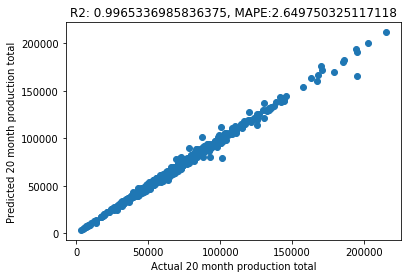

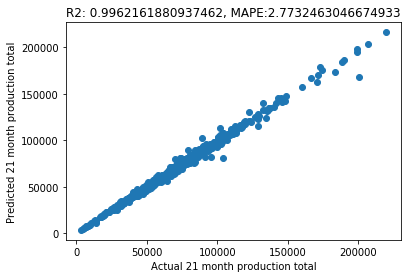

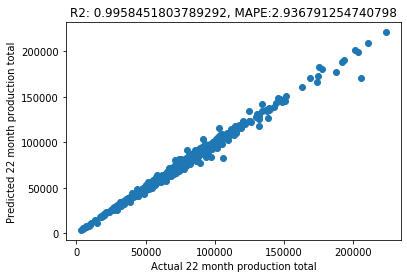

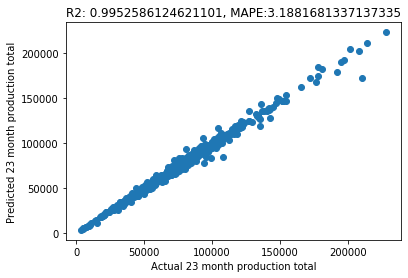

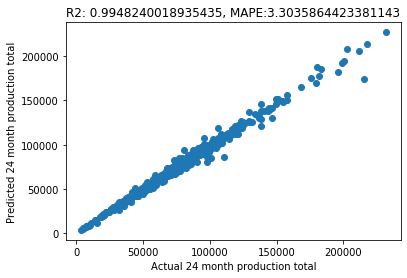

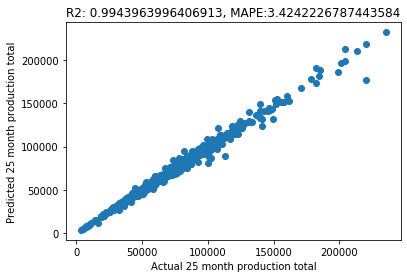

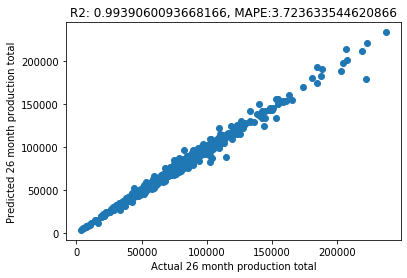

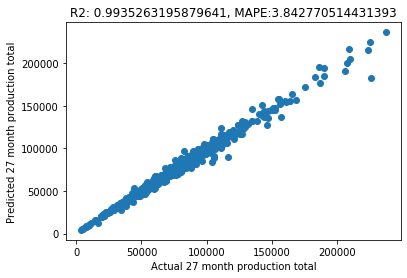

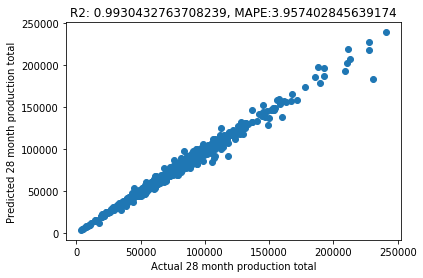

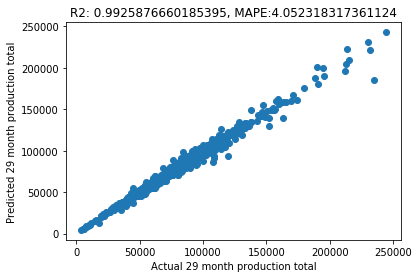

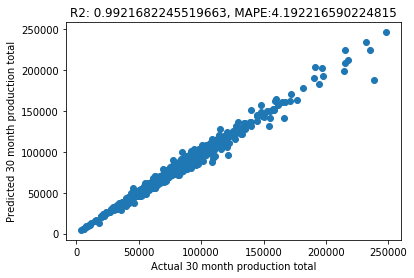

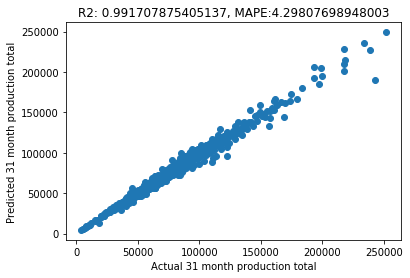

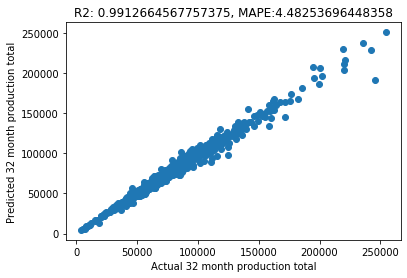

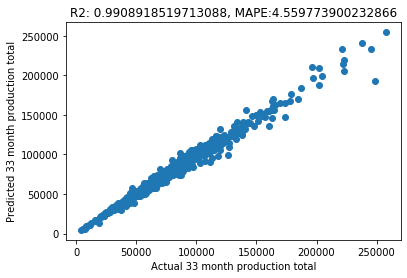

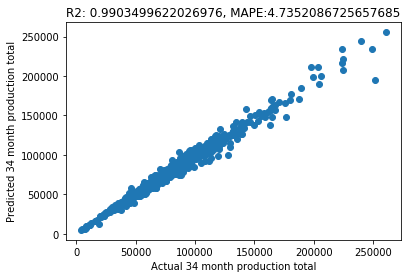

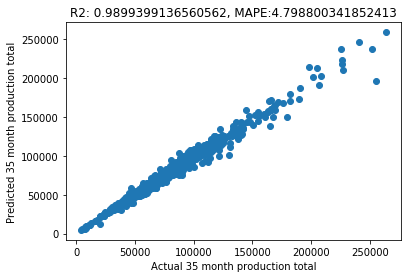

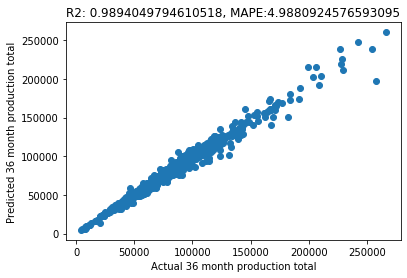

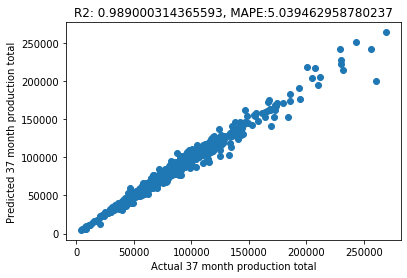

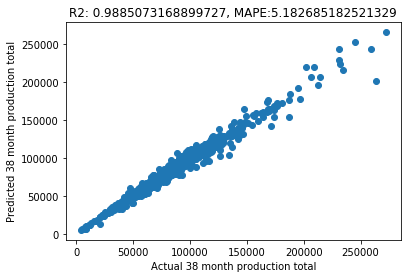

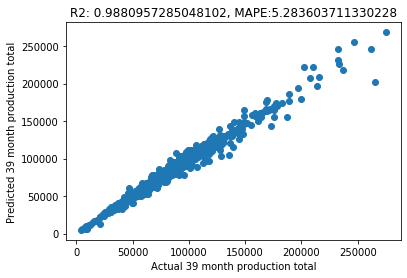

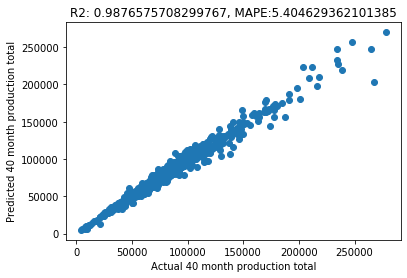

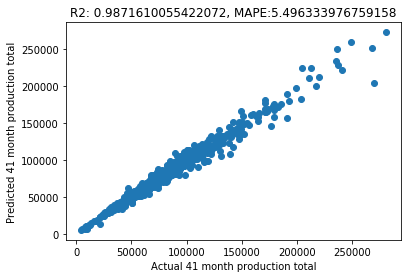

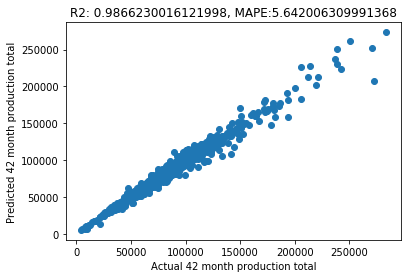

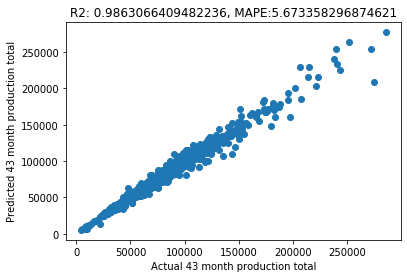

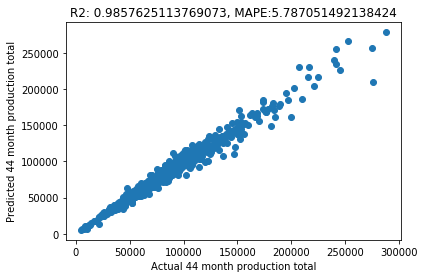

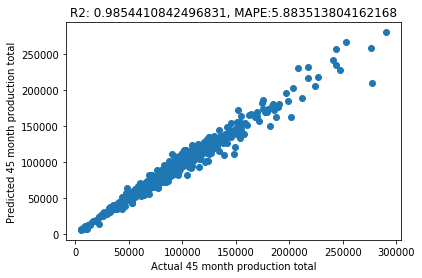

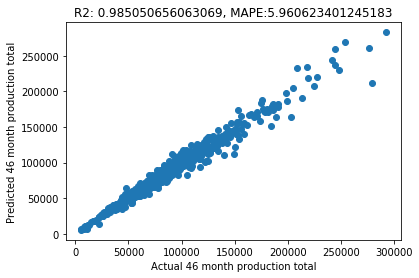

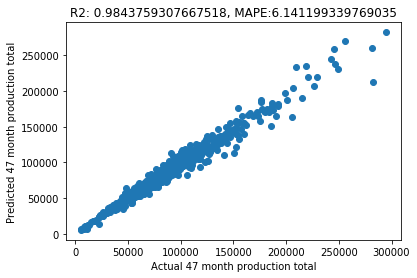

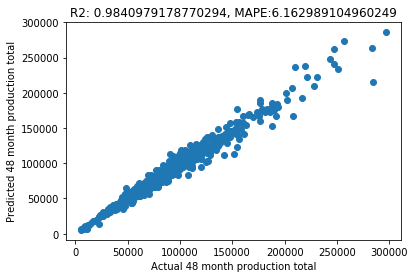

In [211]:
# Actual vs Predicted Plots for Test Set

for i in range(13,49):
    plt.scatter(y_test[str(i)],preds[str(i)])
    plt.xlabel(f"Actual {str(i)} month production total")
    plt.ylabel(f"Predicted {str(i)} month production total")
    plt.title(f"R2: {np.corrcoef(y_test[str(i)],preds[str(i)])[0][1]}, MAPE:{mape(y_test[str(i)].values,preds[str(i)].values)}")
    plt.show()

- Below are a few actual vs predicted cum time plots using 6 months as input and forecasting out to 24 months

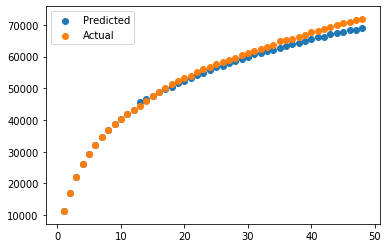

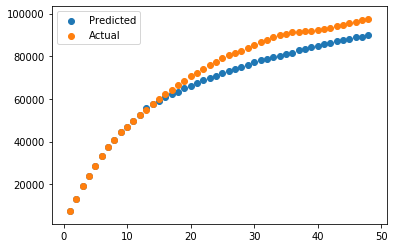

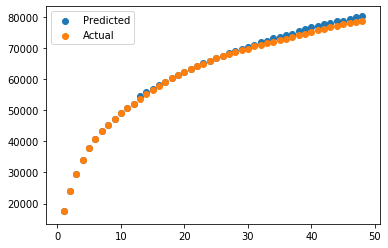

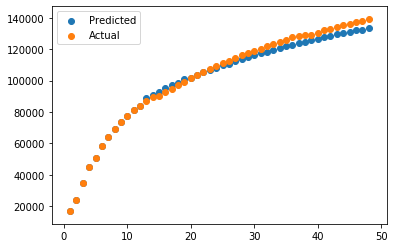

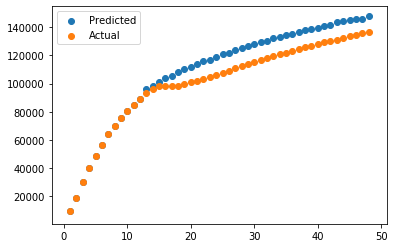

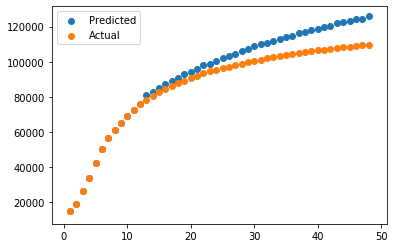

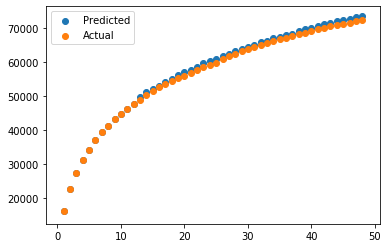

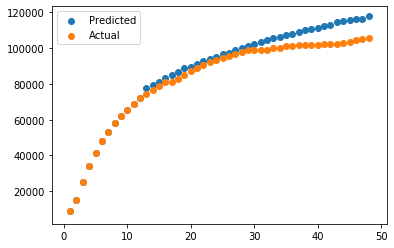

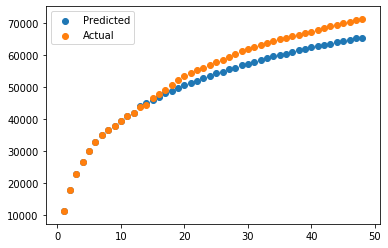

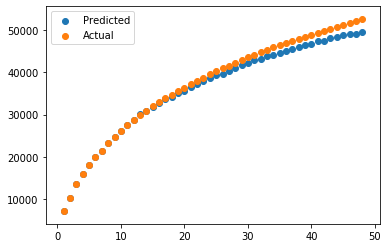

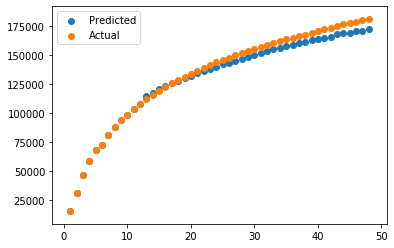

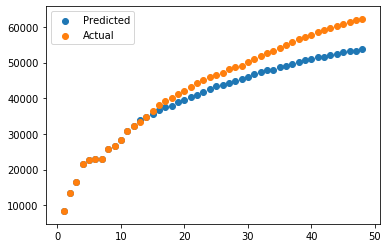

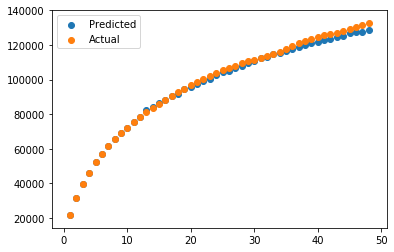

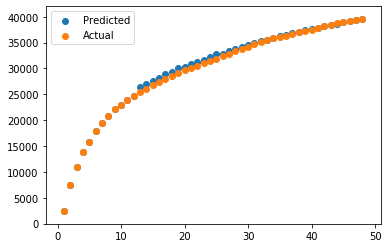

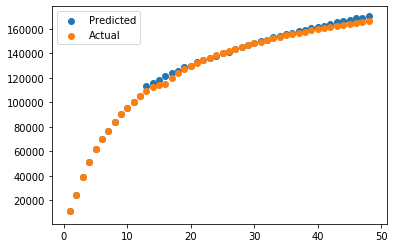

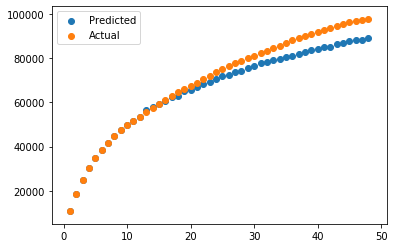

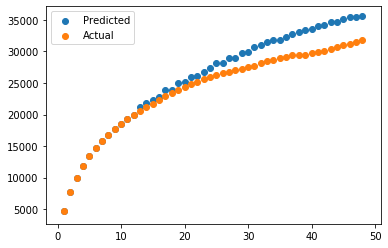

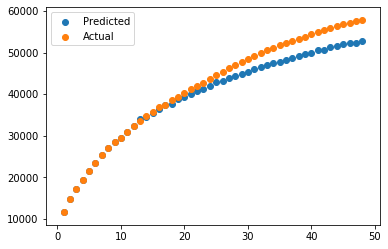

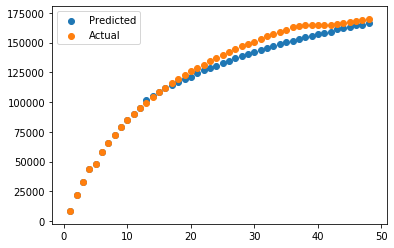

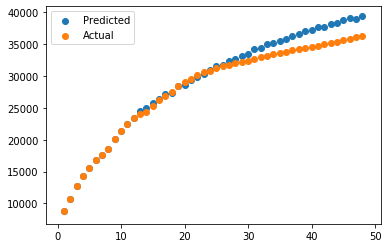

In [212]:
# Predicted cum vs time plot
X_test.index = range(0,X_test.shape[0])
preds.index = range(0,X_test.shape[0])
predicted_all = X_test.join(preds,on=X_test.index)

y_test.index = range(0,X_test.shape[0])
actual_all = X_test.join(y_test,on=X_test.index)

i = 100
for _,row in predicted_all.iloc[100:120].iterrows():
    plt.scatter(range(1,49),row.drop(['Lateral Length','Latitude','Longitude']),label="Predicted")
    plt.scatter(range(1,49),actual_all.drop(['Lateral Length','Latitude','Longitude'],axis=1)[actual_all.index==i],label="Actual")
    plt.legend()
    i = i +1
    plt.show()


In [215]:
# Training model on entire data
final_model = Sequential()
final_model.add(Dense(100,input_dim=X_train.shape[1],activation="relu"))
final_model.add(Dense(150,activation="relu"))
final_model.add(Dense(50,activation="relu"))
final_model.add(Dense(y.shape[1]))
final_model.compile(loss="mse", optimizer="adam")
final_model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 100)               1600      
_________________________________________________________________
dense_93 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_94 (Dense)             (None, 50)                7550      
_________________________________________________________________
dense_95 (Dense)             (None, 36)                1836      
Total params: 26,136
Trainable params: 26,136
Non-trainable params: 0
_________________________________________________________________


In [216]:
final_model.fit(X.drop('API14',axis=1), y, epochs=100, batch_size=12, verbose=0)

In [220]:
import joblib
joblib.dump(final_model,'dj_test.pkl')

['dj_test.pkl']

## Making predictions using trained model

In [221]:
model = joblib.load('dj_test.pkl')

In [236]:
data_predict = data[X.columns]
data_predict = data_predict.dropna()
preds = model.predict(data_predict.drop('API14',axis=1))
preds = pd.DataFrame(preds,columns=y.columns)
preds.columns = ['Predicted ' + i for i in y.columns]
preds.index = range(0,preds.shape[0])
total_data = data_predict.join(preds,on=data_predict.index)
total_data

,API14,Lateral Length,Latitude,Longitude,1,2,3,4,5,6,...,Predicted 39,Predicted 40,Predicted 41,Predicted 42,Predicted 43,Predicted 44,Predicted 45,Predicted 46,Predicted 47,Predicted 48
0,5001062740000,1896.00,39.938676,-104.653787,225.0,369.0,490.0,545.0,885.0,971.0,...,2624.772705,2711.614990,2749.013428,2973.559326,2821.905273,2976.396240,2983.415527,2978.780518,3102.552490,3182.808105
2,5001097420000,8140.00,39.779010,-104.614040,16175.0,24778.0,31103.0,36478.0,41302.0,44938.0,...,20139.193359,20349.943359,20481.273438,20597.126953,20792.283203,20918.529297,21034.423828,21209.787109,21414.089844,21419.251953
3,5001097530100,3912.00,39.766188,-104.548120,2719.0,5137.0,6552.0,7642.0,8571.0,9336.0,...,20242.753906,20306.056641,20410.566406,20521.582031,20594.025391,20756.898438,20906.654297,20952.556641,21132.722656,21157.837891
4,5001097540000,3544.00,39.770004,-104.548231,1192.0,2415.0,5964.0,8277.0,9564.0,10582.0,...,27316.324219,27517.558594,27777.373047,27916.658203,28126.103516,28356.128906,28532.943359,28600.527344,28827.335938,28962.076172
5,5001097600100,4042.00,39.743713,-104.506397,1057.0,3601.0,6235.0,8588.0,10128.0,11525.0,...,53988.042969,54836.335938,54649.828125,55278.890625,54701.750000,55340.410156,55930.035156,56655.660156,57003.765625,57009.503906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,5123467040000,10094.00,40.943469,-104.393713,15251.0,21097.0,25691.0,29563.0,32721.0,35344.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6988,5123468220000,9057.00,40.088900,-104.507080,8545.0,16804.0,32879.0,49079.0,64713.0,78146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6989,5123468300000,9056.00,40.088900,-104.505670,8887.0,17559.0,26127.0,34505.0,43907.0,50962.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6995,5123468420000,10057.84,40.943491,-104.403094,10393.0,22439.0,32858.0,39079.0,44584.0,49090.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
X

,API14,Lateral Length,Latitude,Longitude,1,2,3,4,5,6,7,8,9,10,11,12
0,5001062740000,1896.0,39.938676,-104.653787,225.0,369.0,490.0,545.0,885.0,971.0,1029.0,1090.0,1157.0,1225.0,1226.0,1333.0
1,5001097540000,3544.0,39.770004,-104.548231,1192.0,2415.0,5964.0,8277.0,9564.0,10582.0,11429.0,12099.0,12831.0,13396.0,13398.0,13427.0
2,5001097600100,4042.0,39.743713,-104.506397,1057.0,3601.0,6235.0,8588.0,10128.0,11525.0,12689.0,13683.0,14626.0,15388.0,16215.0,16922.0
3,5001097780000,4333.0,39.985120,-104.942100,19857.0,27480.0,29727.0,36785.0,41884.0,46131.0,49938.0,53137.0,56157.0,58449.0,60674.0,62614.0
4,5001097790000,3816.0,39.766971,-104.623432,18963.0,30768.0,36808.0,41949.0,50350.0,56130.0,61089.0,65539.0,69407.0,73043.0,76412.0,77594.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,5123415060000,9464.0,40.440347,-104.507632,27646.0,46352.0,58698.0,69524.0,78182.0,86027.0,92552.0,98744.0,104213.0,108988.0,113451.0,117654.0
3134,5123415330000,9491.0,40.396729,-104.489047,24863.0,44333.0,57947.0,68070.0,76667.0,84171.0,90438.0,96292.0,101487.0,106025.0,110314.0,114369.0
3135,5123415340000,9071.0,40.400059,-104.487173,21380.0,35606.0,44359.0,50961.0,56675.0,61654.0,65780.0,69532.0,72881.0,75787.0,78478.0,80911.0
3136,5123415350000,8873.0,40.398264,-104.487071,24480.0,41200.0,52620.0,61328.0,68874.0,75539.0,81085.0,86258.0,90822.0,94868.0,98618.0,102124.0
